In [1]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
#import utils
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit, sys
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

/pbs/home/c/cpayerne/.conda/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import analysis

In [3]:
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [4]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC')
import analysis

In [5]:
 d = '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/'

In [6]:
import matplotlib as mpl

In [37]:
def splot(file):
    print(1)
    ssc_contOmunbinned = []
    sn_contOmunbinned = []
    Om = []
    Nobs = []
    for f in file:
        #print(f)
        Om_, y = np.load(f, allow_pickle=True)
        ssc_contOmunbinned.append([y[i][0] for i in range(len(Om_))])
        sn_contOmunbinned.append([y[i][1] for i in range(len(Om_))])
        Om.append(Om_)
        Nobs.append(int(f.split('Nobs=')[1].split('_z')[0]))
    plt.figure(figsize = (5,5))
    ax = plt.axes()
    label = file
    plt.xlabel(r'$\Omega_m$', fontsize=20)
    plt.ylim(0., 10)
    plt.xlim(0.23, 0.4)
    plt.vlines(0.30711, -3, 20, zorder=0, color='k', lw=1, )
    y = sn_contOmunbinned# sn_contOmbinned[0]]
    yssc = ssc_contOmunbinned# ssc_contOmbinned[0]]
    x = Om
    #Nobs = int(f.split('Nobs=')[1].split('_z')[0])
    color = ['darkgray', 'indianred', 'darkblue','cyan']
    for i, y_ in enumerate(y):
        #Poisson likelihood
        mask = (x[i] > 0.2)*(x[i] < 0.4)
        L_SN1 = np.exp((y_ - np.mean(y_)))
        P_SN2 = L_SN1[mask]/np.trapz(L_SN1[mask], x[i][mask])
        xmean = np.trapz(P_SN2*x[i][mask],x[i][mask])
        sigma2SN = np.trapz(P_SN2*(x[i][mask] - xmean)**2,x[i][mask])
        print(f'{xmean:.5f} {sigma2SN**.5:.5f}')
        plt.plot(x[i][mask], .05*P_SN2, ls='-' ,c=color[i],lw=1, zorder=3, alpha=1, label = r'$N_{\rm obs}$'+f'$={Nobs[i]}$')
        #print( )
        #
        #plt.plot(x[i], np.array(y[i])-np.min(y[i]), ls='-' ,c=color[i], zorder=5)
        L_SSCSN1 = np.exp((yssc[i]) - np.mean(yssc[i]))
        P_SSCSN2 = L_SSCSN1[mask]/np.trapz(L_SSCSN1[mask], x[i][mask])
        #xmean = np.trapz(P_SSCSN2[mask]*x[i],x[i])
        #sigma2SSC = np.trapz(P_SSCSN2*(x[i] - xmean)**2,x[i])
        #print(f'{xmean:.5f} {sigma2SSC**.5:.5f}')
        #print((sigma2SN**.5)/(sigma2SSC**.5))
        #plt.fill_between(x[i][mask], .05*P_SSCSN2, 0*( .03*P_SSCSN2), alpha=.4, color = color[i], edgecolor=color[i], zorder=1, label = label[i])
        
        #lnSSC = np.array(yssc[i])[mask] - np.array(y[i])[mask]
        #plt.plot(x[i][mask],lnSSC - lnSSC[100], color = color[i])
        plt.plot(x[i][mask],P_SSCSN2/P_SN2, ls=(0, (5, 5)),color = color[i])
    #plt.plot(
    plt.tick_params(axis='both', which = 'major', labelsize= 15)
    plt.legend()
    plt.savefig('ssc_preliminary.png', bbox_inches='tight', dpi=300)
    return 0

1
0.30376 0.00281
0.29675 0.00608
0.30172 0.00882


/tmp/ipykernel_24384/2140178707.py:48: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x[i][mask],P_SSCSN2/P_SN2, ls=(0, (5, 5)),color = color[i])
/tmp/ipykernel_24384/2140178707.py:48: RuntimeWarning: invalid value encountered in divide
  plt.plot(x[i][mask],P_SSCSN2/P_SN2, ls=(0, (5, 5)),color = color[i])


0

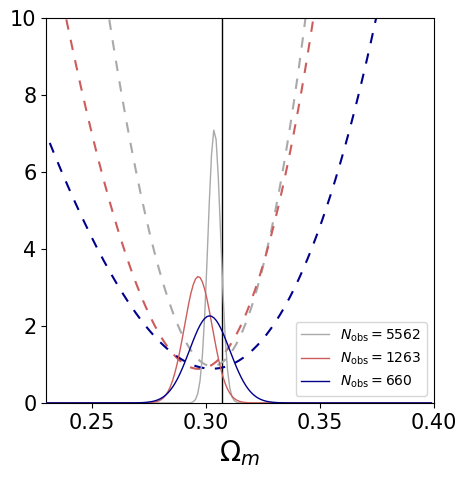

In [38]:
splot(glob.glob(d + '*Unbinned_cat=701*')[:-1])

1
0.31638 0.00876
0.30890 0.00323
0.30880 0.00281
0.31348 0.00606


/tmp/ipykernel_24384/690242478.py:45: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x[i][mask],P_SSCSN2/P_SN2, ls=(0, (5, 5)),color = color[i])


0

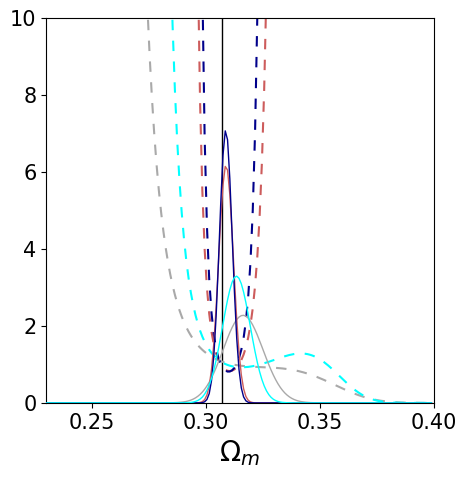

In [27]:
splot(glob.glob(d + '*Binned_cat=700_*_nzxnm=5x5_*'))

In [10]:
#splot(glob.glob(d + '*Binned_cat=700_*_nzxnm=5x5_*'))